## **Import necessary Libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter



from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## **Load the Dataset**

In [48]:
df =  pd.read_csv('Fertilizer_Prediction.csv')

## **Attributes Description**


*   N - ratio of Nitrogen content in soil
*   P - ratio of Phosphorous content in soil
*   K - ratio of Potassium content in soil
*   temperature - temperature in degree
*   Celsius
*   humidity - relative humidity in %
*   Moisture in Soil
*   Soil Type
*   Crop Type

In [49]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,20.879744,82.002744,38,Sandy,Maize,37,0,0,Urea
1,21.770462,80.319644,45,Loamy,Sugarcane,12,0,36,DAP
2,23.004459,82.320763,62,Black,Cotton,7,9,30,14-35-14
3,26.491096,80.158363,34,Red,Tobacco,22,0,20,28-28
4,20.130175,81.604873,46,Clayey,Paddy,35,0,0,Urea


In [11]:
df["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [12]:
df.size

990

In [13]:
df.shape

(110, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      110 non-null    float64
 1   Humidity         110 non-null    float64
 2   Moisture         110 non-null    int64  
 3   Soil Type        110 non-null    object 
 4   Crop Type        110 non-null    object 
 5   Nitrogen         110 non-null    int64  
 6   Potassium        110 non-null    int64  
 7   Phosphorous      110 non-null    int64  
 8   Fertilizer Name  110 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 7.9+ KB


In [15]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,23.128298,77.605707,46.690909,21.836364,9.254545,20.827273
std,2.576867,15.997576,15.502439,16.970307,18.724677,17.116899
min,17.916523,14.273280,25.000000,4.000000,0.000000,0.000000
25%,21.418128,80.530328,34.250000,11.000000,0.000000,10.000000
50%,23.439342,82.062032,43.000000,14.500000,0.000000,19.000000
75%,25.251406,83.319776,57.000000,32.500000,9.750000,30.000000
max,26.929951,84.969072,97.000000,99.000000,74.000000,81.000000


In [16]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [17]:
df["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts',
       'Red Gram', 'Bengal Gram'], dtype=object)

In [18]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [19]:
labels = df["Fertilizer Name"].unique()
counts = list(df["Fertilizer Name"].value_counts())

In [20]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

In [21]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

### **Model Building**

In [22]:
soil_type_label_encoder = LabelEncoder()
df["Soil Type"] = soil_type_label_encoder.fit_transform(df["Soil Type"])

In [23]:
soilname_dict = {}
for i in range(len(df["Soil Type"].unique())):
    soilname_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soilname_dict)

{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [24]:
crop_type_label_encoder = LabelEncoder()
df["Crop Type"] = crop_type_label_encoder.fit_transform(df["Crop Type"])

In [25]:
cropname_dict = {}
for i in range(len(df["Crop Type"].unique())):
    cropname_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(cropname_dict)

{0: 'Barley', 1: 'Bengal Gram', 2: 'Cotton', 3: 'Ground Nuts', 4: 'Maize', 5: 'Millets', 6: 'Oil seeds', 7: 'Paddy', 8: 'Pulses', 9: 'Red Gram', 10: 'Sugarcane', 11: 'Tobacco', 12: 'Wheat'}


In [26]:
fertname_label_encoder = LabelEncoder()
df["Fertilizer Name"] = fertname_label_encoder.fit_transform(df["Fertilizer Name"])

In [27]:
fertname_dict = {}
for i in range(len(df["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [28]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,20.879744,82.002744,38,4,4,37,0,0,6
1,21.770462,80.319644,45,2,10,12,0,36,5
2,23.004459,82.320763,62,0,2,7,9,30,1
3,26.491096,80.158363,34,3,11,22,0,20,4
4,20.130175,81.604873,46,1,7,35,0,0,6


In [29]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [30]:
counter = Counter(y)
counter

Counter({6: 22, 4: 22, 5: 21, 1: 15, 3: 14, 2: 8, 0: 8})

In [31]:
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


## **Splitting the dataset**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (123, 8), (123,)
Train Data: (31, 8), (31,)


In [33]:
acc = []
model = []

#### **SVM_Pipeline**

In [37]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
acc.append(accuracy)
model.append("SVM_Pipeline")

print("Classification Report:")
print(classification_report(y_test, predictions))




# Accuray On Whole Data
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on train Data: {accuracy*100}%")


Accuracy on Test Data: 74.19354838709677%
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       1.00      0.75      0.86         4
           2       0.60      0.60      0.60         5
           3       1.00      1.00      1.00         6
           4       0.50      0.50      0.50         4
           5       0.80      0.67      0.73         6
           6       1.00      1.00      1.00         4

    accuracy                           0.74        31
   macro avg       0.74      0.72      0.72        31
weighted avg       0.78      0.74      0.76        31

Accuracy on train Data: 88.96103896103897%


#### **RandomForest_Pipeline**

In [38]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
acc.append(accuracy)
model.append("RandomForest Pipeline")

print("Classification Report:")
print(classification_report(y_test, predictions))




# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on train Data: {accuracy*100}%")





Accuracy on Test Data: 87.09677419354838%
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         4
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         6
           4       0.50      0.50      0.50         4
           5       1.00      0.67      0.80         6
           6       1.00      1.00      1.00         4

    accuracy                           0.87        31
   macro avg       0.86      0.88      0.86        31
weighted avg       0.89      0.87      0.87        31

Accuracy on train Data: 97.40259740259741%


#### **XGBoost_Pipeline**

In [39]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

acc.append(accuracy)
model.append("XGBoost Pipeline")

print("Classification Report:")
print(classification_report(y_test, predictions))





# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on train  Data: {accuracy*100}%")


Accuracy on Test Data: 96.7741935483871%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      0.75      0.86         4
           5       0.86      1.00      0.92         6
           6       1.00      1.00      1.00         4

    accuracy                           0.97        31
   macro avg       0.98      0.96      0.97        31
weighted avg       0.97      0.97      0.97        31

Accuracy on train  Data: 99.35064935064936%


#### **Comparision of Models**

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

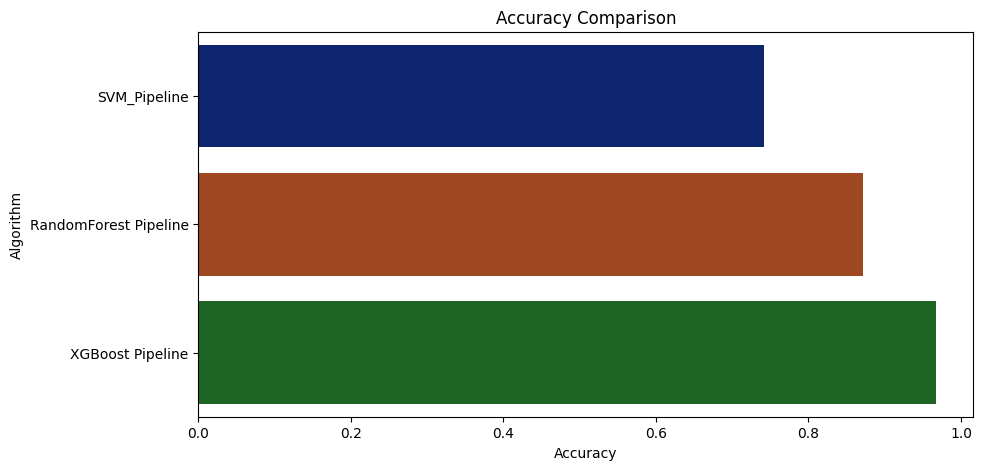

In [40]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

Bagging Classification

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are defined and hold your data
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating base classifier
base_classifier = DecisionTreeClassifier(random_state=18)

# Creating bagging classifier
bagging_clf = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=18)

# Fitting the bagging classifier
bagging_clf.fit(X_train, y_train)

# Predictions and accuracy on Test Data
predictions = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Predictions and accuracy on Whole Data
# Assuming X and y are the whole dataset
predictions_whole = bagging_clf.predict(X)
accuracy_whole = accuracy_score(y, predictions_whole)
print(f"Accuracy on Whole Data: {accuracy_whole*100}%")


Accuracy on Test Data: 96.7741935483871%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       0.80      1.00      0.89         4
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.97      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31

Accuracy on Whole Data: 99.35064935064936%


In [52]:
import joblib

# Save the model to disk
joblib.dump(bagging_clf, 'bagging_classifier_model.pkl')

print("Model saved successfully as 'bagging_classifier_model.pkl'")



Model saved successfully as 'bagging_classifier_model.pkl'


In [2]:
pip show scikit-learn


Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\Users\konap\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
